# Analyzing Portfolio Risk and Return

Objective: Determine the fund of four new investment options with the most investment potential based on key risk-management metrics: the daily returns, standard deviations, Sharpe ratios, and betas to include inin the client portfolios.

In [2]:
import pandas as pd
import numpy as np
from pathlib import Path
%matplotlib inline

## Read Data convert to daily returns

In [3]:
navs_df = pd.read_csv(
    Path("./Resources/whale_navs.csv"),
    index_col='date', 
    infer_datetime_format=True, 
    parse_dates=True
)

navs_daily_returns_df = navs_df.pct_change().dropna()

navs_daily_returns_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-02,-0.000442,0.000150,0.000013,0.000171,0.000154
2014-10-03,0.001052,0.000368,0.000394,0.001248,0.011009
2014-10-06,0.002456,-0.000008,0.000066,0.000267,-0.001170
2014-10-07,-0.002621,-0.000317,-0.000208,-0.000587,-0.015436
2014-10-08,0.000390,0.000369,0.000242,0.000842,0.017489
...,...,...,...,...,...
2020-09-04,-0.001079,0.005050,-0.000653,-0.003985,-0.008165
2020-09-08,-0.001737,-0.001888,-0.001270,-0.005019,-0.027323
2020-09-09,0.001115,0.002123,0.002701,0.001817,0.019747


## Quantitative Analysis

<AxesSubplot:title={'center':'Daily Returns'}, xlabel='date'>

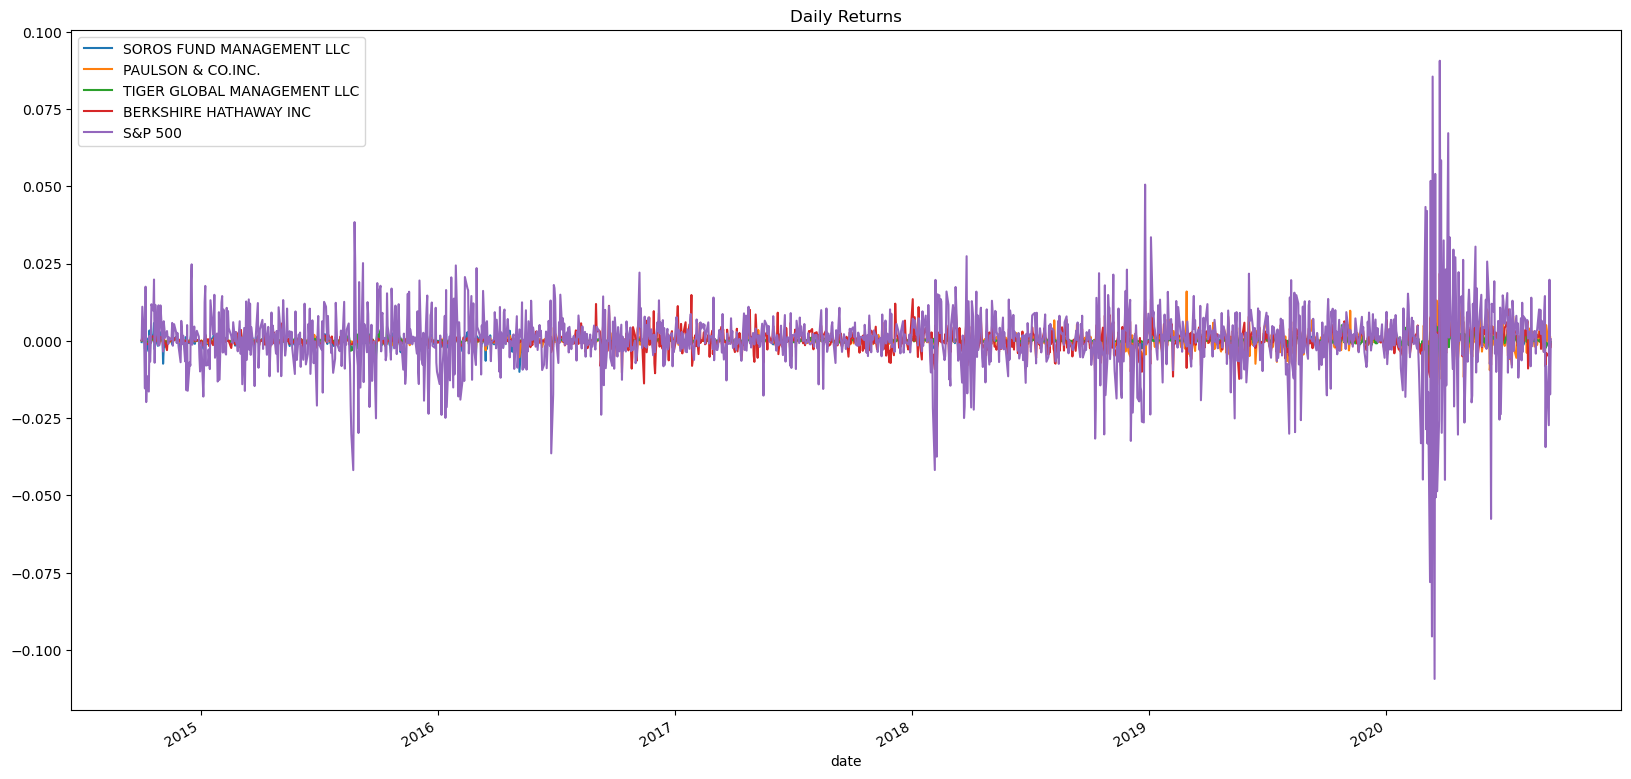

In [4]:
# NAV daily return visualization
navs_daily_returns_df.plot(figsize=(20, 10), title="Daily Returns")

### Cumulative returns

In [8]:
navs_cumulative_returns_df = (1 + navs_daily_returns_df).cumprod()
navs_cumulative_returns_df.tail(2)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2020-09-10,0.985498,0.959740,1.055539,1.237883,1.717983
2020-09-11,0.985086,0.957887,1.055081,1.236625,1.718858


<AxesSubplot:title={'center':'Cumulative Returns'}, xlabel='date'>

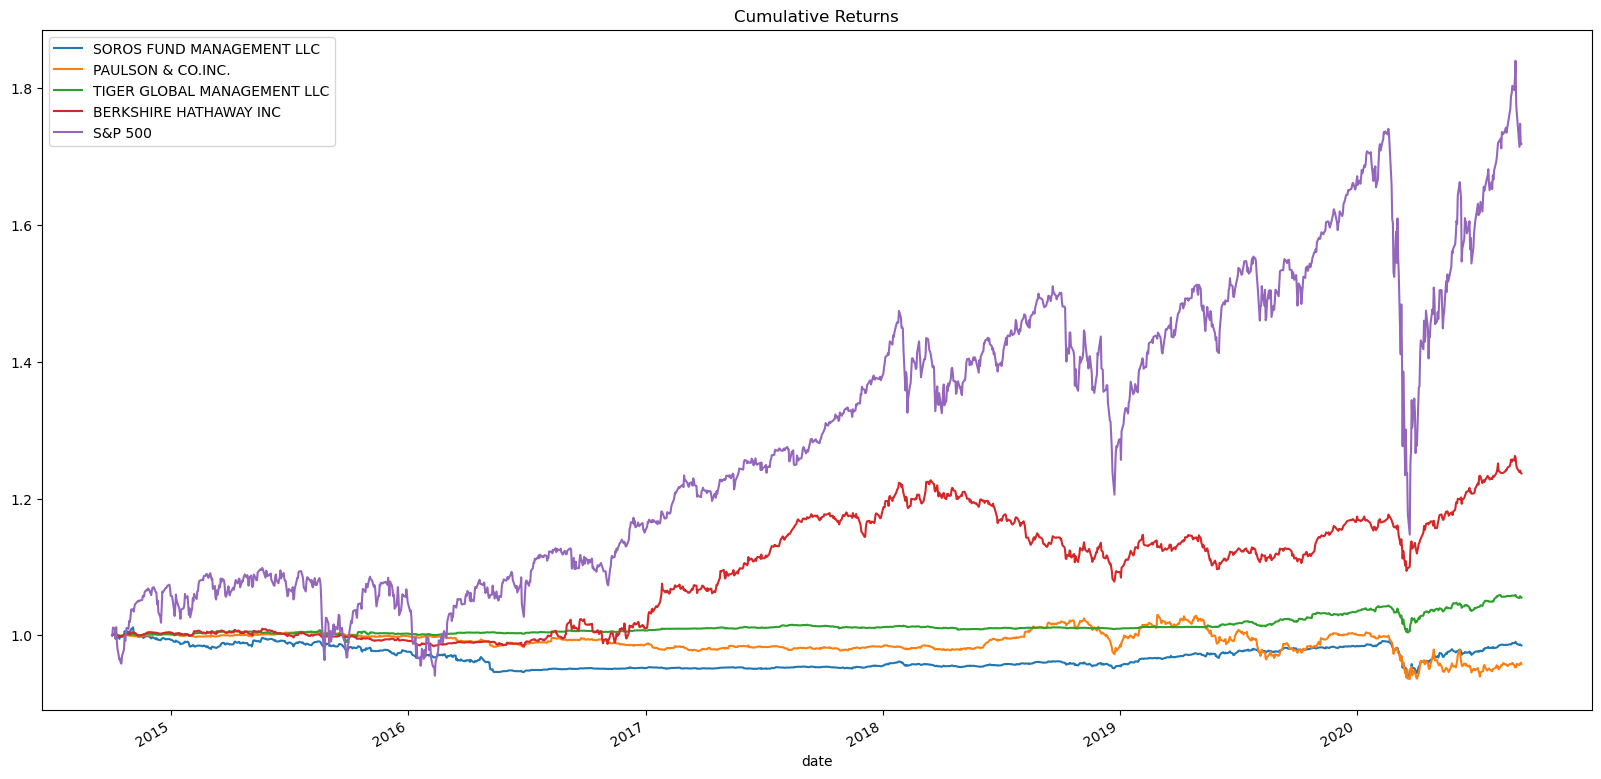

In [9]:
navs_cumulative_returns_df.plot(figsize=(20,10), title="Cumulative Returns")

All four investment funds fall short of the S&P 500

### Volatilty Analysis

<AxesSubplot:title={'center':'Portfolio Volatility'}>

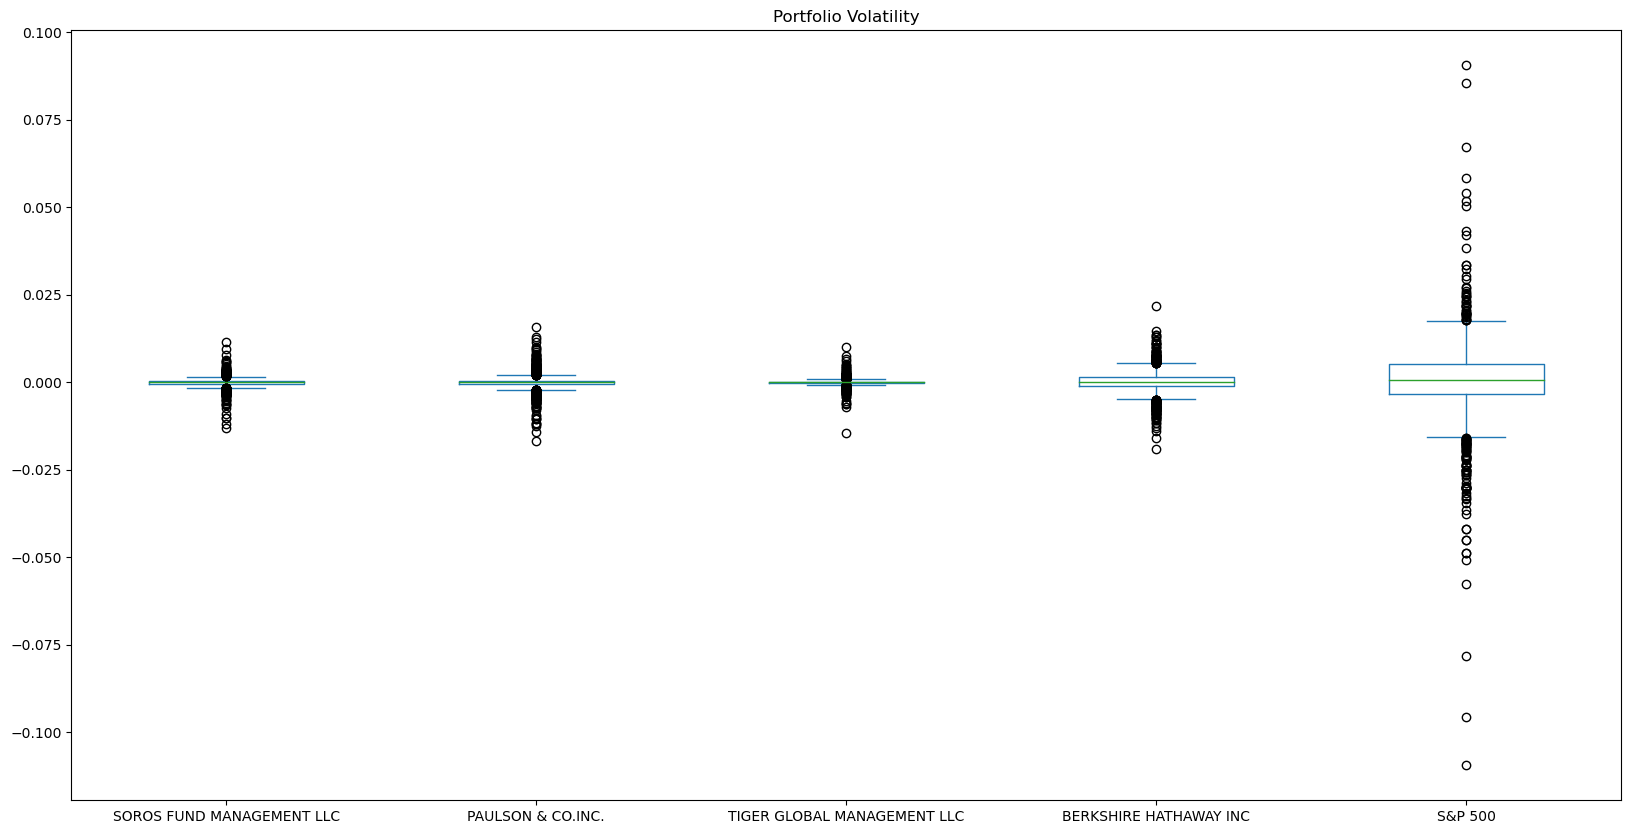

In [11]:
navs_daily_returns_df.plot.box(figsize=(20,10), title="Portfolio Volatility")

<AxesSubplot:title={'center':'Fund Volatility'}>

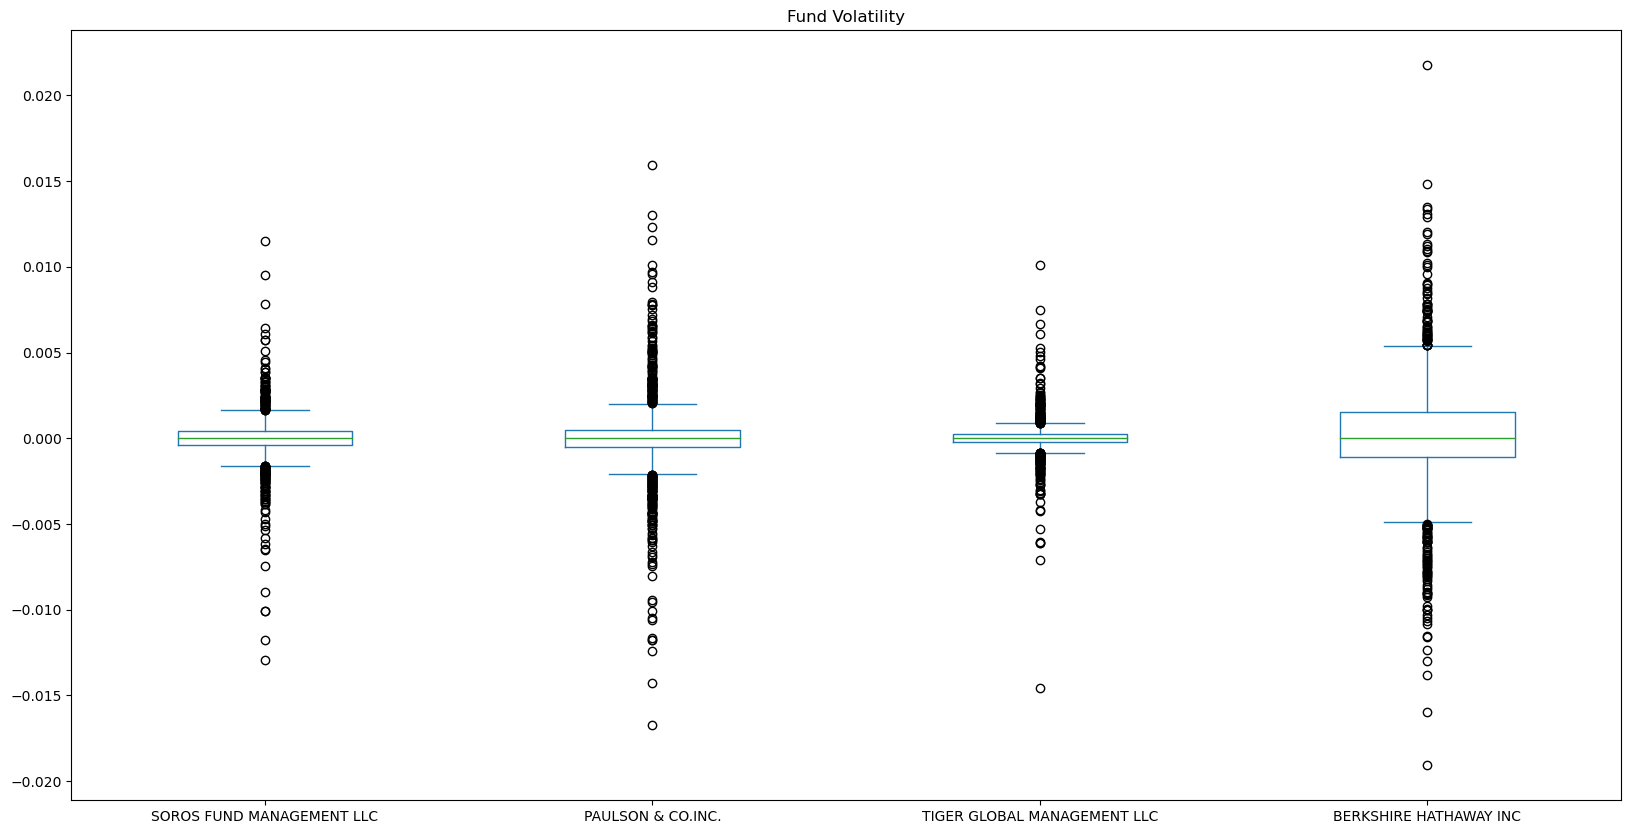

In [12]:
fund_daily_returns_df = navs_daily_returns_df.drop(columns=["S&P 500"])
fund_daily_returns_df.plot.box(figsize=(20, 10), title="Fund Volatility")


When compare to boarder market funds have lower volatilty. A narower look we see that Berkshire Hathaway has the largest spread, makig it the most volatile. Tiger Global Management LLC was the least volatile

### Risk Analysis

In [15]:
# Using standard Deviavtion as a metric for daily risk

navs_standard_deviations = navs_daily_returns_df.std()
navs_standard_deviations.sort_values()

TIGER GLOBAL MANAGEMENT LLC    0.000996
SOROS FUND MANAGEMENT LLC      0.001405
PAULSON & CO.INC.              0.002199
BERKSHIRE HATHAWAY INC         0.003256
S&P 500                        0.011550
dtype: float64

In [16]:
# Using standard Deviavtion as a metric for annaul risk

navs_annual_standard_deviations = navs_standard_deviations * np.sqrt(252)
navs_annual_standard_deviations.sort_values()

TIGER GLOBAL MANAGEMENT LLC    0.015804
SOROS FUND MANAGEMENT LLC      0.022297
PAULSON & CO.INC.              0.034912
BERKSHIRE HATHAWAY INC         0.051692
S&P 500                        0.183345
dtype: float64

The S&P500 (market) is riskier the the four funds

<AxesSubplot:title={'center':'21 Day Rolling Standard Deviation'}, xlabel='date'>

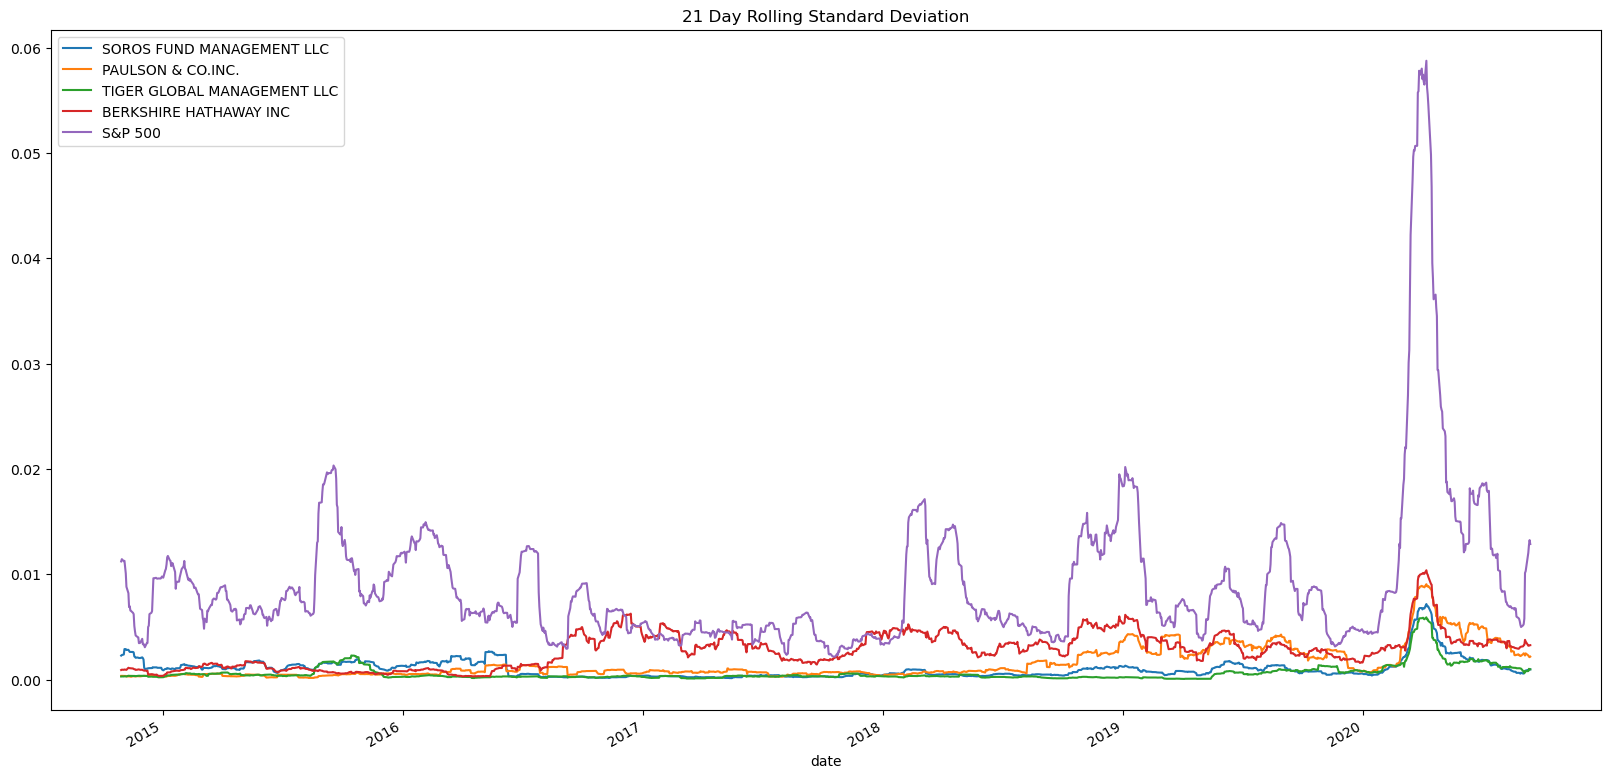

In [17]:
# Rolling one month
navs_daily_returns_df.rolling(window=21).std().plot(figsize=(20,10), title="Month Rolling Standard Deviation")

Based on the the rolling standard deviation metricBerkshire Hathaway has the highest risk of the four funds

### Risk Return Analysis